# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [3]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

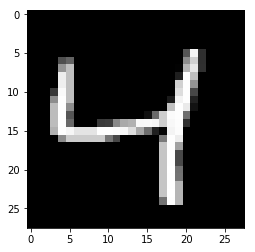

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [8]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value


image_size =  mnist.train.images.shape[1]
# Input and target placeholders
inputs_ = tf.placeholder(dtype=tf.float32, shape=(None, image_size), name='inputs')
targets_ = tf.placeholder(dtype=tf.float32, shape=(None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_,encoding_dim,activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded,image_size,activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits,name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [9]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [10]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6894
Epoch: 1/20... Training loss: 0.6858
Epoch: 1/20... Training loss: 0.6823
Epoch: 1/20... Training loss: 0.6764
Epoch: 1/20... Training loss: 0.6708
Epoch: 1/20... Training loss: 0.6644
Epoch: 1/20... Training loss: 0.6565
Epoch: 1/20... Training loss: 0.6478
Epoch: 1/20... Training loss: 0.6366
Epoch: 1/20... Training loss: 0.6235
Epoch: 1/20... Training loss: 0.6099
Epoch: 1/20... Training loss: 0.5946
Epoch: 1/20... Training loss: 0.5795
Epoch: 1/20... Training loss: 0.5663
Epoch: 1/20... Training loss: 0.5470
Epoch: 1/20... Training loss: 0.5290
Epoch: 1/20... Training loss: 0.5115
Epoch: 1/20... Training loss: 0.4955
Epoch: 1/20... Training loss: 0.4753
Epoch: 1/20... Training loss: 0.4606
Epoch: 1/20... Training loss: 0.4434
Epoch: 1/20... Training loss: 0.4237
Epoch: 1/20... Training loss: 0.4122
Epoch: 1/20... Training loss: 0.3990
Epoch: 1/20... Training loss: 0.3824
Epoch: 1/20... Training loss: 0.3780
E

Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1825
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1859
Epoch: 1/20... Training loss: 0.1854
Epoch: 1/20... Training loss: 0.1827
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1873
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1868
E

Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1602
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1611
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1605
Epoch: 2/20... Training loss: 0.1608
Epoch: 2/20... Training loss: 0.1492
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1496
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1594
Epoch: 2/20... Training loss: 0.1568
E

Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1302
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1310
E

Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1244
E

Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1123
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1130
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1130
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1186
E

Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1122
E

Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1008
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1084
E

Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1058
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1057
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1020
E

Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0960
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1026
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1044
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.1034
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0967
E

Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0937
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0926
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0946
E

Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0911
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.1018
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0976
E

Epoch: 10/20... Training loss: 0.0998
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0917
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.1007
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0907
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0996
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0996
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0993
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0897
Epoch: 13/20... Training loss: 0.0981
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0895
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0986
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0980
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0985
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0987
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0896
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0976
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0893
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0889
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0888
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0970
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0896
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0984
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0895
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0888
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0994
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0885
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0936


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

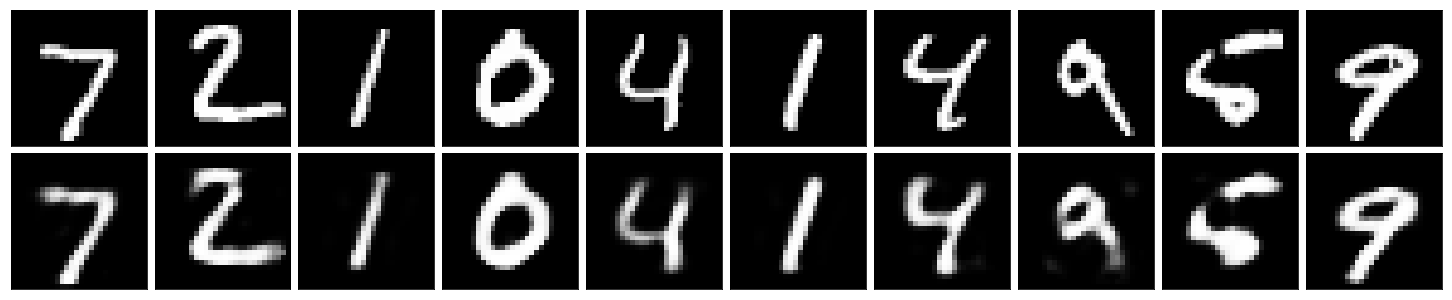

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [12]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.